<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# 🛍️ Launch New Products

Today you are a machine learning engineer at the Department of New Products at Target Cosmetics! 

We will start with a small dataset on interactions between users and current products from the past and try to discover substructure, if there's any, by applying some **unsupervised learning** methods. 

Then we will leverage the small amount of labeled data (current products) in combination with a larger amount of unlabeled data (new products to launch) to make estimations as to which products will sell more. 

## 📚 Learning Objectives

By the end of this session, you will be able to:

- apply dimensionality reduction techniques to reduce features to a lower dimensional space
- perform customer segmentation, determine optional number of clusters, and understand assumptions for used algorithm
- understand what semi-supervised learning is and leverage it to improve performance of supervised learning

## Task 1. Dimensionality Reduction

1. Load in the data. 
    
    Import `pandas` as `pd` and use `pd.read_csv()` to read in `past.csv.gz` in the `dat` folder, saving it as `past`. 
    
    Data in `past.csv.gz` was propcessed; e.g., features indicating time of day, day of week, month, and year of the purchase have been converted to one-hot representations of these categories. 

In [29]:
import pandas as pd

In [30]:
past = pd.read_csv('../dat/past.csv.gz', compression='gzip')

In [31]:
past.sample(4)

,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category
1393,5787164,5.844381e+08,1.000000,1.000000,0.000000e+00,3.97,3.97,0.000000,1.000000,0.000000,...,0.0,0.000000,0.0,1.000000,0.0,0.0,0.000000,0,0.000000,1.000000
1560,5687218,4.842442e+08,1.000000,1.000000,0.000000e+00,0.57,0.57,0.000000,1.000000,0.000000,...,0.0,0.000000,0.0,1.000000,0.0,0.0,0.000000,0,0.000000,1.000000
1443,5770258,5.430146e+08,1.666667,1.333333,1.372127e+06,2.70,2.65,0.833333,0.166667,0.666667,...,0.5,0.333333,0.0,0.333333,0.0,0.0,0.166667,1,0.166667,1.833333
741,5741040,5.940537e+08,1.000000,1.000000,0.000000e+00,4.76,4.76,0.000000,1.000000,0.000000,...,1.0,0.000000,0.0,0.000000,1.0,0.0,0.000000,0,0.000000,1.000000


In [32]:
past.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            5000 non-null   int64  
 1   user_id               5000 non-null   float64
 2   NumOfEventsInJourney  5000 non-null   float64
 3   NumSessions           5000 non-null   float64
 4   interactionTime       5000 non-null   float64
 5   maxPrice              5000 non-null   float64
 6   minPrice              5000 non-null   float64
 7   NumCart               5000 non-null   float64
 8   NumView               5000 non-null   float64
 9   NumRemove             5000 non-null   float64
 10  InsessionCart         5000 non-null   float64
 11  InsessionView         5000 non-null   float64
 12  InsessionRemove       5000 non-null   float64
 13  Weekend               5000 non-null   float64
 14  Fr                    5000 non-null   float64
 15  Mon                  

In [33]:
past.columns

Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')

<details>
<summary> Expected output </summary>

```
Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')
```
</details>

2. What percentage of the interactions (rows) resulted in a purchase?

    Do people mostly buy what they look at or do they do a lot of "window shopping" (shopping around without buying)?
    
    From the perspective of classification, is the data balanced?

In [34]:
# past[past['Purchased?'] == 1]
past.describe()
# 34%

,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5.573727e+06,5.235286e+08,1.951080,1.327052,2.490234e+05,7.457600,7.426321,0.541953,0.893687,0.413592,...,0.169931,0.213311,0.065900,0.162676,0.244012,0.169207,0.085550,0.343800,0.059343,1.143728
std,1.161840e+06,5.998702e+07,1.324727,0.718266,6.920382e+05,11.883206,11.876266,0.565350,0.841036,0.772170,...,0.255599,0.275556,0.172911,0.246050,0.289270,0.252342,0.191101,0.475023,0.153912,0.438141
min,4.104000e+03,6.524181e+07,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.760491e+06,4.998498e+08,1.000000,1.000000,0.000000e+00,2.483750,2.480000,0.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,5.830816e+06,5.343735e+08,1.750000,1.166667,3.626375e+03,4.440585,4.440000,0.500000,1.000000,0.222222,...,0.000000,0.142857,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.875312e+06,5.616843e+08,2.308355,1.500000,2.071993e+05,7.620000,7.550000,0.858766,1.000000,0.632775,...,0.250000,0.333333,0.040000,0.250000,0.363636,0.250000,0.090909,1.000000,0.041888,1.045996
max,5.932538e+06,6.220262e+08,40.000000,28.000000,1.087537e+07,236.510000,236.510000,12.000000,28.000000,38.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


3. Drop `product_id` and `user_id` and save the rest columns to a new `pd.DataFrame`:`X`; then pop the column `'Purchased?'` and save it to `y`.

In [35]:
X = past.drop(columns=['product_id','user_id'])
y = X.pop('Purchased?')

In [36]:
assert X.shape == (5000, 34)
assert y.shape == (5000,)

4. Apply [PCA (check documentation if unfamiliar)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to reduce the number of features down to **5**, save it to a numpy array named `X_reduced`. 

    Do you need to preprocess the data before performing PCA? Quick review [here: Importance of feature scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html).
    
    If time permits, read [Does mean centering or feature scaling affect a Principal Component Analysis?](https://sebastianraschka.com/faq/docs/pca-scaling.html) or [discussion 1](https://stats.stackexchange.com/questions/53/pca-on-correlation-or-covariance).

In [37]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()
X = scaler.fit_transform(X=X)

In [39]:
pca = PCA(n_components=5)
X_reduced = pca.fit_transform(X=X)
PCA(n_components=5)


PCA(n_components=5)

In [40]:
assert X_reduced.shape == (5000, 5)

5. Print out the percentage of variance explained by each of the selected components.

In [41]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.10282154 0.09444862 0.06498852 0.05108741 0.04268204]
[130.2518894  124.83598001 103.55242812  91.81188291  83.91982286]


6. Review code in functions `visualize_2pcs` and `visualize_3pcs` below and visualize first few principal components in 2D and 3D plots, respectively:

In [42]:
import matplotlib.pyplot as plt

def visualize_2pcs(pcs, y):
    fig, ax = plt.subplots()
    plot = plt.scatter(pcs[:,0], pcs[:,1], c=y) 
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

In [43]:
def visualize_3pcs(pcs, y):
    fig, ax = plt.subplots()
    ax = fig.add_subplot(projection='3d')
    plot = ax.scatter(pcs[:,0], pcs[:,1], pcs[:,2], c=y)
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

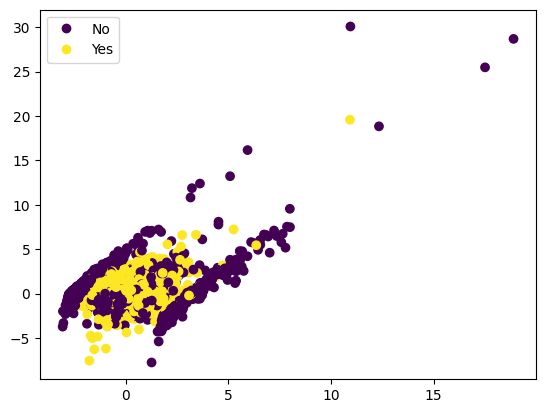

In [44]:
visualize_2pcs(X_reduced, y)

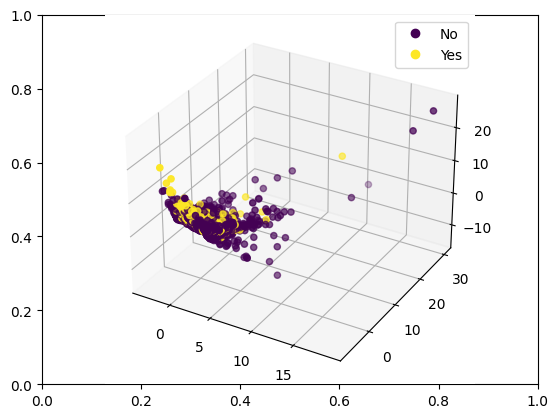

In [45]:
visualize_3pcs(X_reduced, y)

7. One way to assess the quality of the dimensionality reduction, when the groundtruth is available of course, is comparing the prediction performance using given features vs reduced (engineered) features.

    Complete the wrapper function below that 

    - takes features, target, and a boolean parameter indicating whether to include standardization in the pipeline or not
    - split the data into train (80%) and test (20%) datasets, set the random state for spliting at 0
    - build a pipeline that 

        1) preprocessing data using standardization if the `standardize` is `True`; otherwise skip this step  

        2) apply logistic regression ( are the labels balanced? )
        
    - fit the pipeline using training data
    - print the classification report (use `sklearn.metrics.classification_report`) on test data

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [47]:
def train(X, y, standardize = True) -> None:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, random_state=42
    )
    if standardize:
        pipeline = Pipeline(steps=[('scaler', StandardScaler()), 
                                   ('logistic_regression', LogisticRegression(class_weight='balanced'))]).fit(X_train, y_train)
    else:
        pipeline = Pipeline(steps=[('logistic_regression', LogisticRegression(class_weight='balanced'))]).fit(X_train, y_train)
                
    y_pred = pipeline.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=['0', '1']))
    print()
    print("accuracy:", accuracy_score(y_test, y_pred))
    print("precision:", precision_score(y_test, y_pred))
    print("recall:", recall_score(y_test, y_pred))
    print("f1 score:", f1_score(y_test, y_pred))
    print("roc auc score:", roc_auc_score(y_test, y_pred))
    print("confusion matrix:")
    print(confusion_matrix(y_test, y_pred))

Now apply the pipeline on all the features of `X` and review the performance

In [48]:
train(X,y)

              precision    recall  f1-score   support

           0       0.76      0.77      0.76       659
           1       0.54      0.53      0.54       341

    accuracy                           0.69      1000
   macro avg       0.65      0.65      0.65      1000
weighted avg       0.69      0.69      0.69      1000


accuracy: 0.688
precision: 0.5435435435435435
recall: 0.530791788856305
f1 score: 0.5370919881305637
roc auc score: 0.6500696425313391
confusion matrix:
[[507 152]
 [160 181]]


Similarly, apply the pipeline on the reduced / engineered features `X_reduced`. Should you include standardization in the pipeline?

In [49]:
train(X_reduced,y, standardize=False)

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       659
           1       0.51      0.55      0.53       341

    accuracy                           0.67      1000
   macro avg       0.64      0.64      0.64      1000
weighted avg       0.67      0.67      0.67      1000


accuracy: 0.668
precision: 0.5122615803814714
recall: 0.5513196480938416
f1 score: 0.5310734463276836
roc auc score: 0.6398479879315946
confusion matrix:
[[480 179]
 [153 188]]


8. Are the results as expected? Discuss the pros and cons using reduced set of features in this application with your teammate. 
    *YOUR ANSWER HERE*
    
`The metrics appear low. With empirical calibrations, the metrics could be improved.`

## Task 2. Customer Segmentation

In this task, we apply k-means clustering on the reduced data, experimenting different vaules of `n_cluster`, summarize all this information in a single plot, the *Elbow* plot. In addition, leverage silhouette visualization to help decide the "optimal" number of clusters in our data and answer: 

1. Are there any patterns among customer purchasing behaviors?
2. If so, what categories do they belong to? How do you characterize the clusters?
3. If not, what followup steps and / or recommendations will you make as an MLE?

`As illustrated below, clusters/categories 0 and 1 recorded more purchases than 2 and 3. Clusters 0 and 1 equally show large numbers of non-purchases.`

`Recommendation: The company should investigate why too many observations did not convert into purchases in clusters 0 and 1, with the aim of a positive conversion. These amount to potential increased revenue.`

In [160]:
past[past['Purchased?']==1].groupby('cluster_pca').describe().T.loc['Purchased?']  # purchases

cluster_pca,0,1,2,3
count,747.0,891.0,25.0,56.0
mean,1.0,1.0,1.0,1.0
std,0.0,0.0,0.0,0.0
min,1.0,1.0,1.0,1.0
25%,1.0,1.0,1.0,1.0
50%,1.0,1.0,1.0,1.0
75%,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0


In [161]:
past[past['Purchased?']==0].groupby('cluster_pca').describe().T.loc['Purchased?']  # purchases

cluster_pca,0,1,2,3
count,1485.0,1601.0,115.0,80.0
mean,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0


1. Look up the [documentation](https://scikit-learn.org/stable/modules/clustering.html) and import the model class for k-means from `sklearn.cluster`

In [51]:
from sklearn.cluster import KMeans
import random

2. Complete `visualize_elbow`; inspect the code and complete

    - fit k-means on the given data `X` and `k`, setting `random_state` to be 10 for reproducibility
    - append the sum of squared distances of samples to their closest cluster center for each $k$ to list `inertias`

In [52]:
def visualize_elbow(X, ks):
    fig, ax = plt.subplots()
    inertias = []
    for k in ks:
        kmeanModel = KMeans(random_state=10, n_clusters=k)
        kmeanModel.fit(X)
        inertias.append(kmeanModel.inertia_)
        
    plt.plot(ks, inertias)
    plt.xticks(ks)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow plot')

3. Visualize the elbow plot for the number of clusters ranging between 2 and 9. Discuss with your teammate, what is the 'optimal' number of clusters?

/home/chrisogonas/anaconda3/envs/py39_12/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/chrisogonas/anaconda3/envs/py39_12/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/chrisogonas/anaconda3/envs/py39_12/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/chrisogonas/anaconda3/envs/py39_12/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` expl

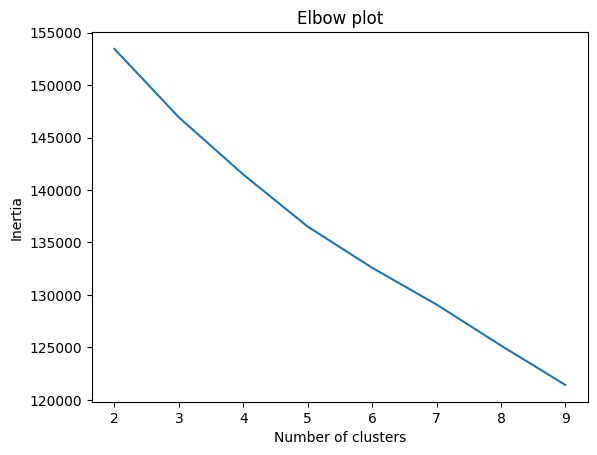

In [53]:
li = range(2,10)
ks = sorted(random.sample(li,8))
visualize_elbow(X=X,ks=ks)

In [54]:
# Expected output

4. What are the disadvantage to use the Elbow method? 

*The method is quite subjective, and it may not work for some data sets. Despite finding an optimal k, there is no fixed data set and therefore it is never clear if k is a static number.*

5. Let's try a different approach: [silhouette score](https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6).

    A helper function `visualize_silhouette` is provided for you (inspect the code in `utils.py`) and figure out how to use it to visualize k-means for k ranges from 2 to 8 on the reduced data. 

In [55]:
from utils import visualize_silhouette

/home/chrisogonas/anaconda3/envs/py39_12/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.25174278629329555


/home/chrisogonas/anaconda3/envs/py39_12/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.2597646275789684


/home/chrisogonas/anaconda3/envs/py39_12/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.2732851122878338


/home/chrisogonas/anaconda3/envs/py39_12/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.2785762616690448


/home/chrisogonas/anaconda3/envs/py39_12/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.24361626342104037


/home/chrisogonas/anaconda3/envs/py39_12/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.25064924270594136


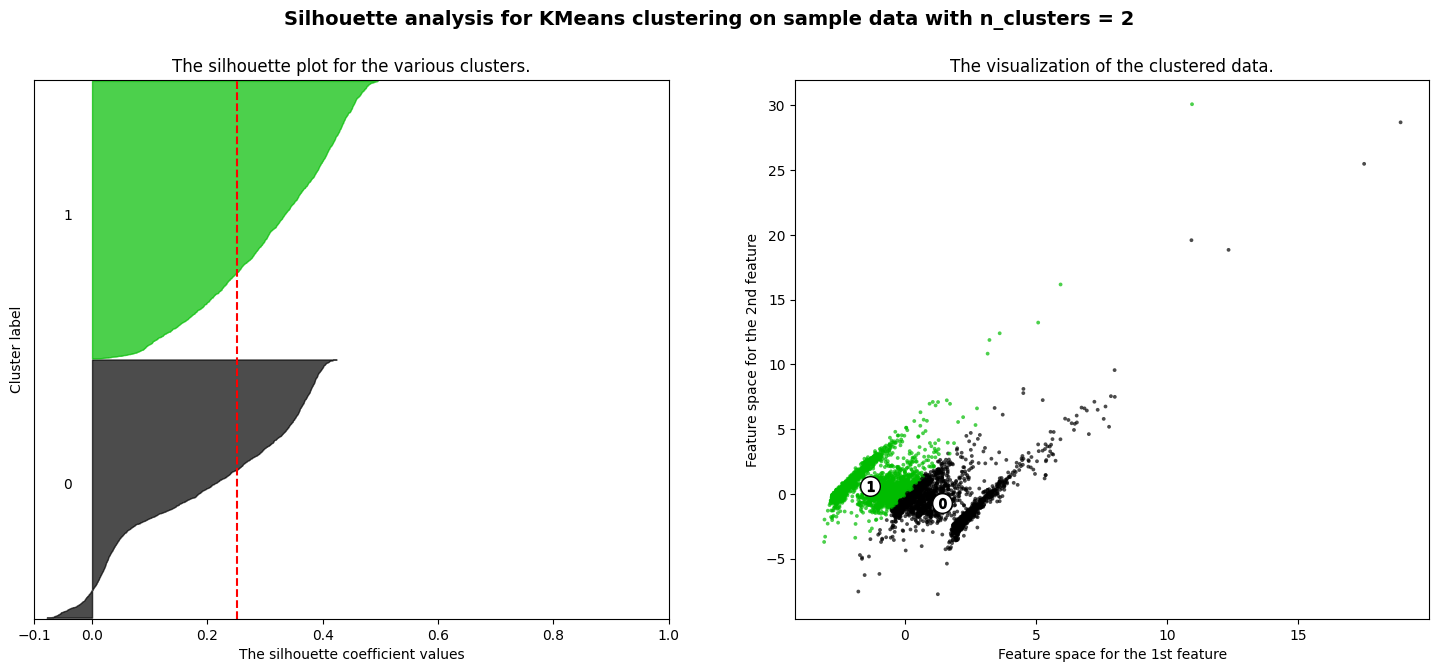

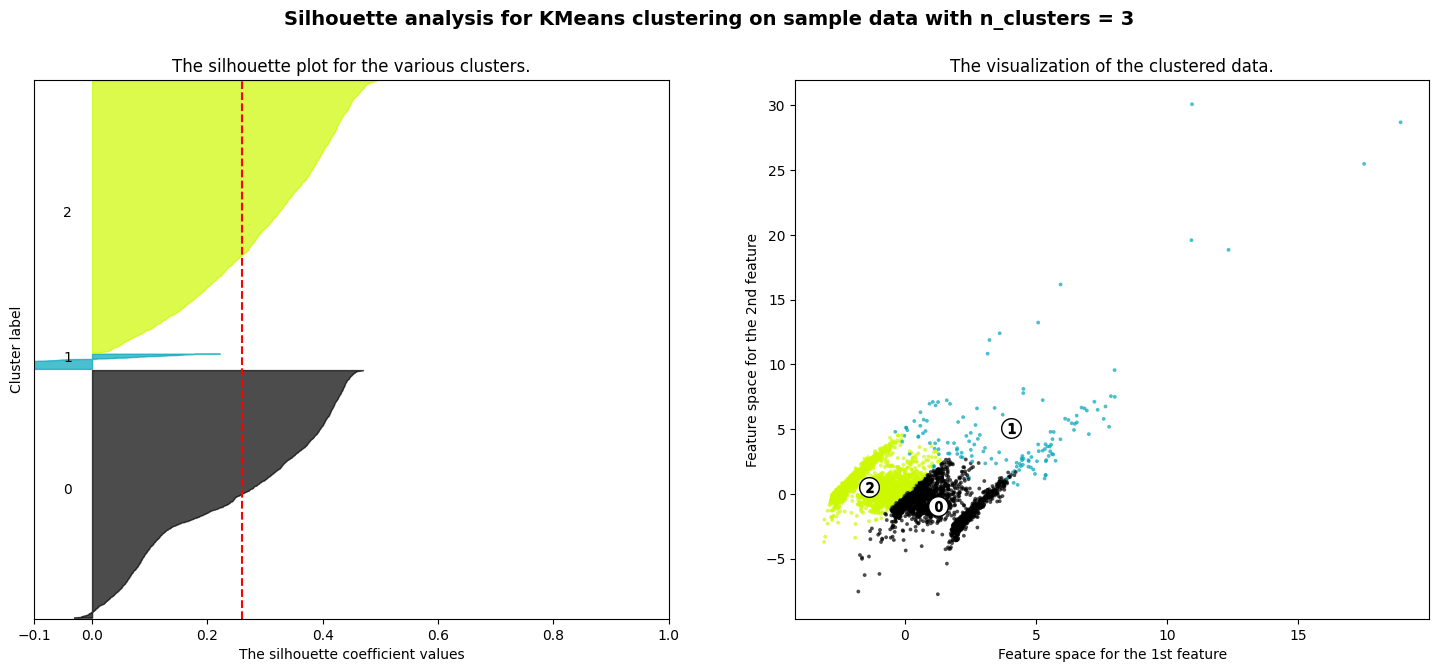

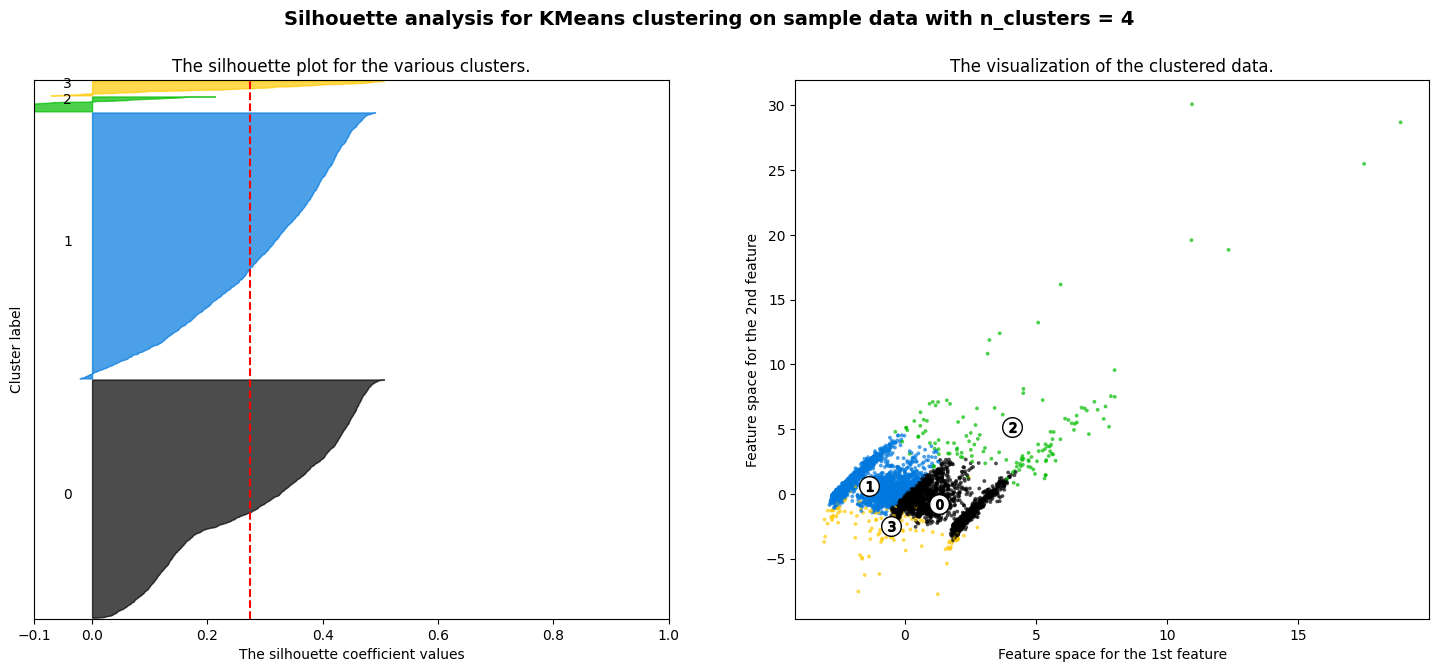

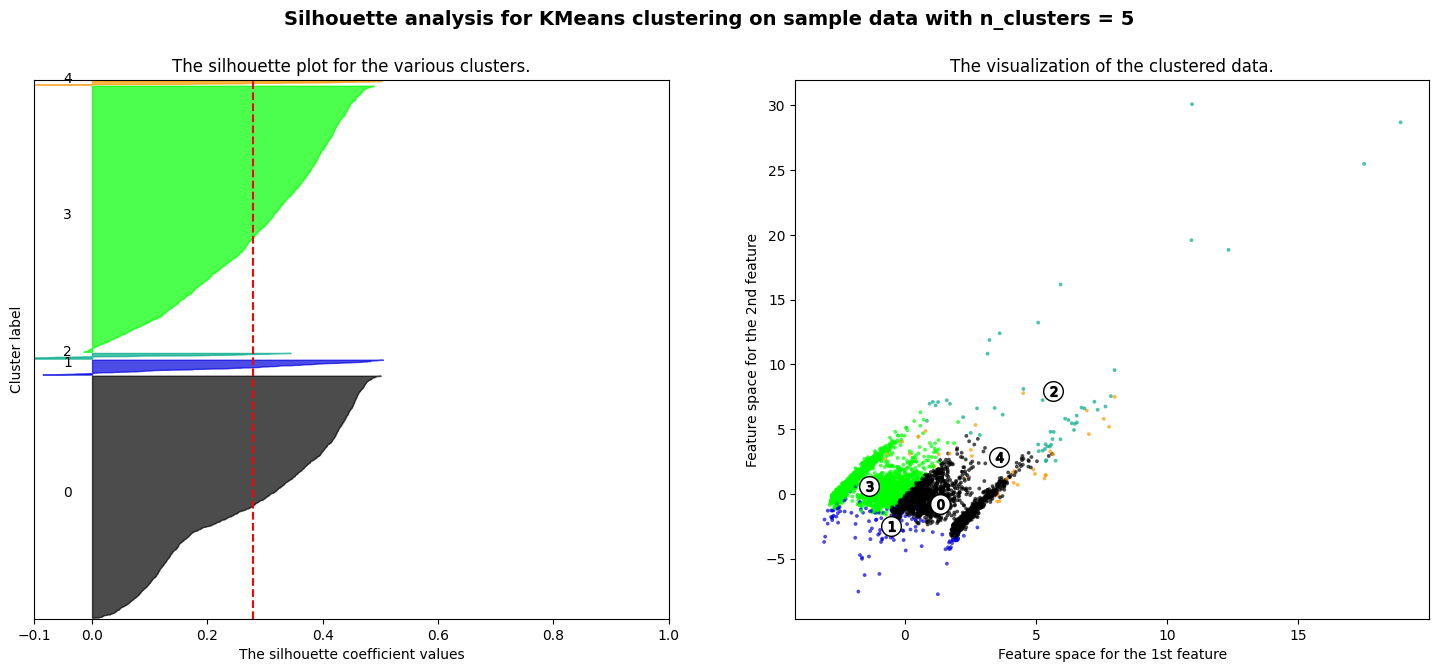

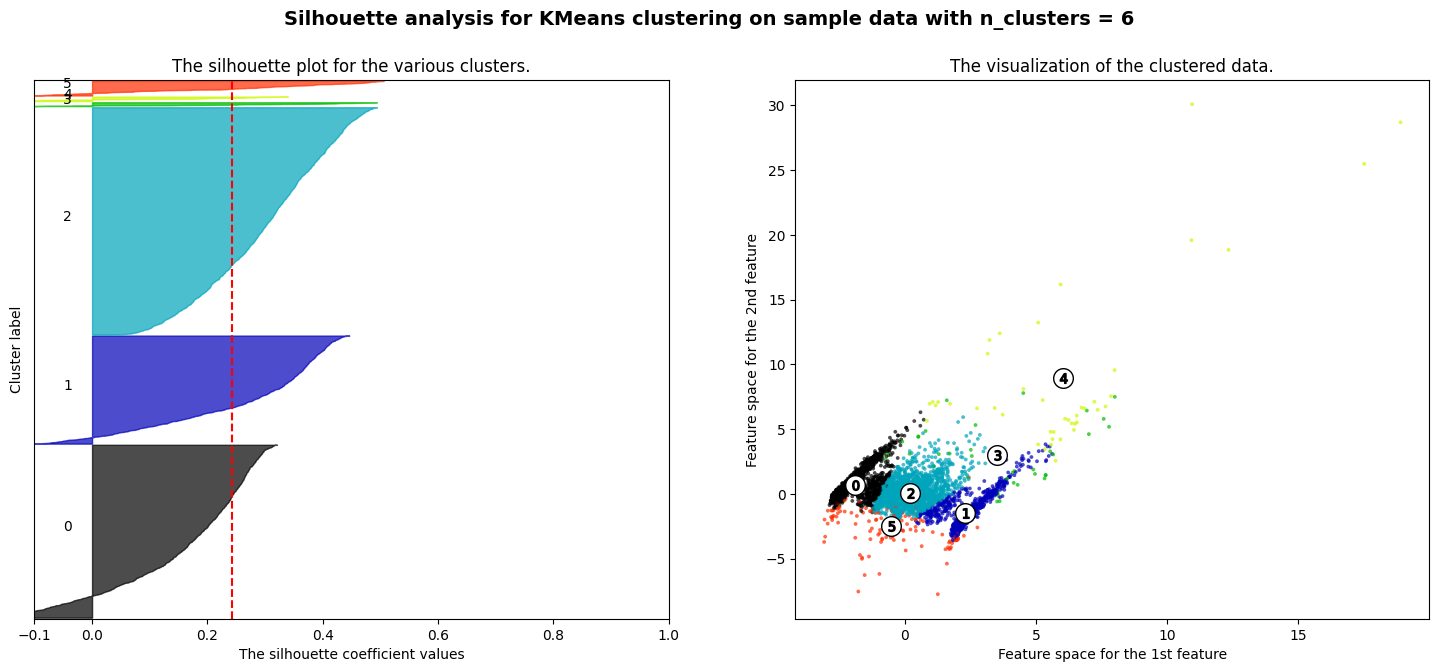

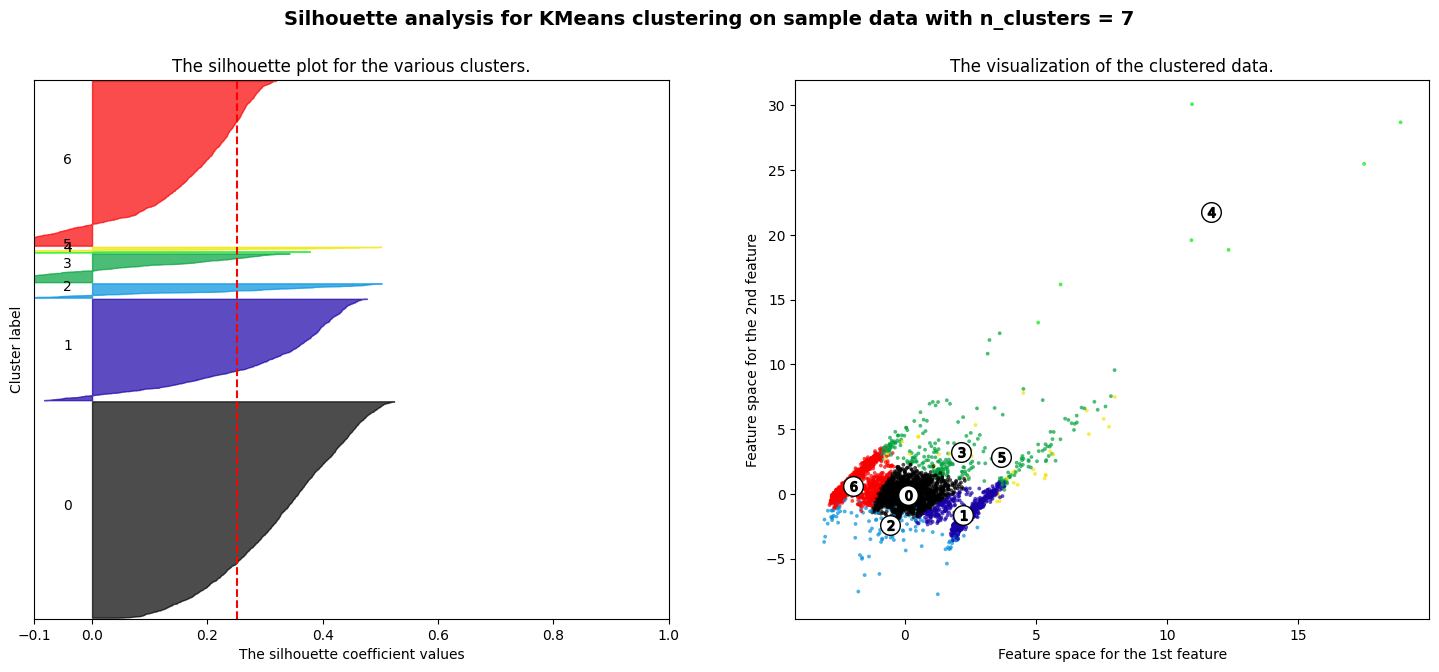

In [56]:
visualize_silhouette(7, X_reduced, random_state=10)

6. Instantiate a k-means model using the number of cluster that you deem optimal, assign it to `km`, and fit on the reduced data. 

In [57]:
km = KMeans(random_state=10, n_clusters=4)
y_kmeans = km.fit_predict(X_reduced)

/home/chrisogonas/anaconda3/envs/py39_12/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7. What is the size of each cluster? 

In [58]:
from collections import Counter
yk_dict = Counter(y_kmeans)
print(yk_dict)

Counter({1: 2492, 0: 2232, 2: 140, 3: 136})


In [59]:
for k in sorted(yk_dict):
    print(f'Cluster {k} has {yk_dict[k]} items')

Cluster 0 has 2232 items
Cluster 1 has 2492 items
Cluster 2 has 140 items
Cluster 3 has 136 items


8. Create a new column called `cluster_pca` in `past`, with values as predicted cluster index predicted by `km`. 

In [60]:
# # YOUR CODE HERE
past['cluster_pca'] = y_kmeans

9. Open ended: manipulate `past` and see if you can characterize each cluster (e.g., calculate statistics of / visualize features for each cluster), how will you intepret the results? 

    **Note**. This is probably the most important part as far as the business stakeholders are concerned: "*What can I do with your results?*" The math, modeling part is relatively easy, compared to actionable recommendations you make for business. Thus, before jumping on a different algorithm for the given task, do you best to 1) understand the data in depth 2) keep buisiness use cases in mind throughout all steps. 

`This is answered in cell 172 below, under the title "EXPECTED REVENUES"`

In [61]:
past.sample(5)

,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category,cluster_pca
4300,5821538,5.585328e+08,2.333333,1.333333,29945.333333,4.750000,4.750000,1.000000,0.666667,0.333333,...,0.000000,0.000000,0.333333,0.666667,0.000000,0.000000,0,0.000000,1.0,1
4885,5780185,4.650948e+08,1.000000,1.000000,0.000000,3.970000,3.970000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0,0.000000,1.0,0
3987,5839418,5.343222e+08,1.363636,1.000000,97.181818,3.248182,3.248182,0.272727,0.818182,0.272727,...,0.090909,0.090909,0.363636,0.181818,0.000000,0.090909,1,0.181818,1.0,0
1696,5921390,5.610460e+08,3.666667,1.666667,551853.000000,4.413333,4.413333,1.000000,1.000000,1.333333,...,0.000000,0.333333,0.000000,0.333333,0.333333,0.000000,1,0.000000,2.0,0
2519,5911237,5.415967e+08,3.000000,1.750000,150565.750000,1.072500,0.715000,0.750000,1.250000,1.000000,...,0.000000,0.000000,0.500000,0.000000,0.250000,0.000000,0,0.250000,1.0,1


In [62]:
# past.sample(3).iloc[:, [-1]]
summ_all = past.groupby('cluster_pca').describe().T  # purchases and non-purchases

In [63]:
summ_all.loc['Purchased?']

cluster_pca,0,1,2,3
count,2232.000000,2492.000000,140.000000,136.000000
mean,0.334677,0.357544,0.178571,0.411765
std,0.471983,0.479373,0.384368,0.493972
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [64]:
past[past['Purchased?']==1].groupby('cluster_pca').describe().T.loc['Purchased?']  # purchases

cluster_pca,0,1,2,3
count,747.0,891.0,25.0,56.0
mean,1.0,1.0,1.0,1.0
std,0.0,0.0,0.0,0.0
min,1.0,1.0,1.0,1.0
25%,1.0,1.0,1.0,1.0
50%,1.0,1.0,1.0,1.0
75%,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0


In [65]:
past[past['Purchased?']==0].groupby('cluster_pca').describe().T.loc['Purchased?'] # no purchases

cluster_pca,0,1,2,3
count,1485.0,1601.0,115.0,80.0
mean,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0


In [66]:
summ_all.loc[['minPrice']]

cluster_pca               0            1           2           3
minPrice count  2232.000000  2492.000000  140.000000  136.000000
         mean      6.354231     5.630747    4.464049   60.971844
         std       5.948381     5.184163    5.494328   33.692208
         min       0.000000     0.000000    0.000000   32.300000
         25%       2.599808     2.380000    1.430000   39.460408
         50%       4.600000     4.125000    3.171667   48.550000
         75%       7.620000     6.750000    5.560000   66.867500
         max      39.680000    33.810000   51.080000  236.510000

In [67]:
summ_all.loc[['maxPrice']]

cluster_pca               0            1           2           3
maxPrice count  2232.000000  2492.000000  140.000000  136.000000
         mean      6.383740     5.650821    4.703531   61.023186
         std       5.967016     5.187368    5.463460   33.698634
         min       0.000000     0.000000    0.000000   32.300000
         25%       2.620000     2.380000    1.590000   39.520000
         50%       4.636875     4.130000    3.790000   49.110000
         75%       7.640772     6.830000    5.597500   66.867500
         max      39.680000    33.810000   51.080000  236.510000

In [171]:
# EXPECTED REVENUES
print(f'Estimated revenue from group 1: ${round(2232 * 6.383740):,d}')
print(f'Estimated revenue from group 2: ${round(2492 * 5.650821):,d}')
print(f'Estimated revenue from group 3: ${round(140 * 4.703531):,d}')
print(f'Estimated revenue from group 4: ${round(136 * 61.023186):,d}')

Estimated revenue from group 1: $14,249
Estimated revenue from group 2: $14,082
Estimated revenue from group 3: $658
Estimated revenue from group 4: $8,299


`There is a huge revenue potential in clusters 1 and 2. The company would be better off focusing on doing more conversions in these two clusters.`

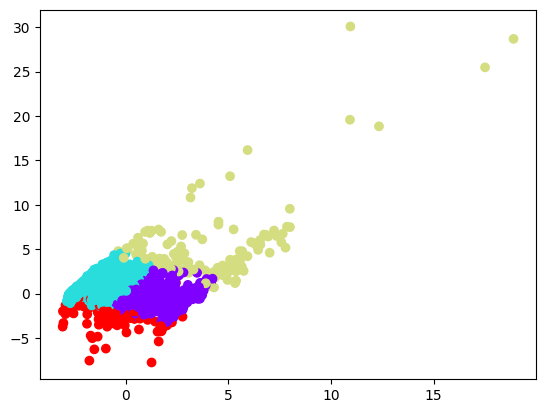

In [69]:
# # YOUR CODE HERE
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=km.labels_, cmap='rainbow')
plt.show()

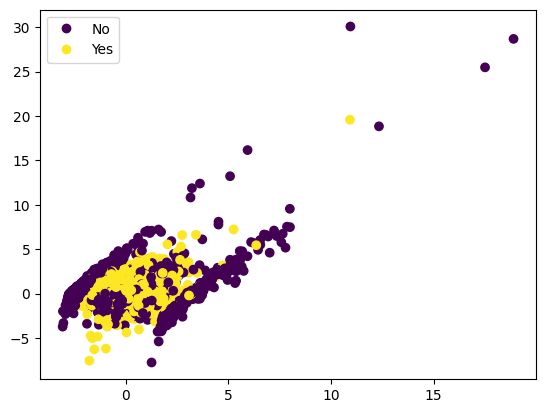

In [70]:
visualize_2pcs(X_reduced,y)

10. What are the assumptions for k-means? Judging by the cluster sizes, is k-means a good approach? 

    Scanning the list of [clustering algorithms](https://scikit-learn.org/stable/modules/clustering.html) implemented in scikit-learn, try at least one other algorithm, examine its assumptions, and intepret results.

`K-means assumes the variance of the distribution of each attribute is spherical i.e. all variables have the equal variance. It assumes that each cluster has roughly equal number of observations.`

11. Jot down recommendations or followup steps, detailing the reasons.

`Identify principal components that can optimize the conversion of clusters 1 and 2 into sales for maximize revenue. Perhaps reduce price for the items, offer promotions and do more marketing for the same.`

## Task 3. To launch or not to launch?

In this task, we will work on a hypothetical application: cosmetics purchase prediction for new products with limited features. The intention here is to maximize **recall** so that no popular cosmetic is understocked. Overstocking is less of a concern since it will not cause disengagement in customers.

The purchase status for each "new" product is known, but we only use the labels for benchmarking purpose. Instead, we use label spreading method to leverage a small amount of labeled data in combination with a larger amount of unlabeled data. 

1. Read in the data in `new.csv.gz` and save it as a `pd.DataFrame` named `new`. This is the test dataset.

    Look at the shape of `new` and inspect the frist few rows.

In [72]:
new = pd.read_csv('../dat/new.csv.gz')

In [73]:
assert new.shape == (30091, 5)

In [74]:
new.head()

,product_id,maxPrice,minPrice,Purchased?,Category
0,5866502,7.616667,7.616667,0,1.0
1,5870408,6.270000,6.270000,0,3.0
2,5900580,10.008000,10.008000,0,1.0
3,5918778,5.980000,5.980000,0,2.5
4,5848772,26.830000,26.830000,0,1.0


2. How does the number of data points in the training set (`past`) compare to the number of datapoints in the test set (`new`)? 

    And how does the feature set in the training set compare to the feature set in the test set?

In [75]:
past.shape[0] - new.shape[0]

# The 'new' dataset has 25091 datapoints more than the 'past' dataset

-25091

In [122]:
past.shape[1] - new.shape[1]

# The 'new' dataset has 33 features less than the 'past' dataset

33

        *YOUR ANSWER HERE*

    *The number of datapoints in the training set is relatively small while the test set is quite large. The training set has more features than in the test set.*

3. Are there any product ids in both the training and test datasets? Hint: use `np.intersect1d` or set operations.

- `Yes, there are product ids in both datasets, as shown below`.

In [77]:
np.intersect1d(past['product_id'], new['product_id'])

array([], dtype=int64)

In [78]:
# YOUR CODE HERE
past.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            5000 non-null   int64  
 1   user_id               5000 non-null   float64
 2   NumOfEventsInJourney  5000 non-null   float64
 3   NumSessions           5000 non-null   float64
 4   interactionTime       5000 non-null   float64
 5   maxPrice              5000 non-null   float64
 6   minPrice              5000 non-null   float64
 7   NumCart               5000 non-null   float64
 8   NumView               5000 non-null   float64
 9   NumRemove             5000 non-null   float64
 10  InsessionCart         5000 non-null   float64
 11  InsessionView         5000 non-null   float64
 12  InsessionRemove       5000 non-null   float64
 13  Weekend               5000 non-null   float64
 14  Fr                    5000 non-null   float64
 15  Mon                  

In [79]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30091 entries, 0 to 30090
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  30091 non-null  int64  
 1   maxPrice    30091 non-null  float64
 2   minPrice    30091 non-null  float64
 3   Purchased?  30091 non-null  int64  
 4   Category    30091 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 1.1 MB


4. What percentage of data points resulted in a purchase in the test set?

    In reality, we won't be able to calculate information that is not available to you. Here, we simply demonstrated that the distributions in target between `past` and `new` are similar. 

In [80]:
# YOUR CODE HERE # ~.344
new['Purchased?'].mean()

0.3442557575354757

In [81]:
new.describe()

,product_id,maxPrice,minPrice,Purchased?,Category
count,3.009100e+04,30091.000000,30091.000000,30091.000000,30091.000000
mean,5.590238e+06,7.715709,7.681662,0.344256,1.135825
std,1.121504e+06,13.044306,13.011201,0.475133,0.429911
min,3.752000e+03,0.000000,0.000000,0.000000,0.000000
25%,5.760772e+06,2.530149,2.519375,0.000000,1.000000
50%,5.831620e+06,4.520000,4.472857,0.000000,1.000000
75%,5.871056e+06,7.780000,7.780000,1.000000,1.000000
max,5.932595e+06,327.034545,327.034545,1.000000,4.000000


5. Create `ndarray`s: `X_train`, `y_train`, `X_test`, and `y_test` according to the following guidelines.

    - The `Purchased?` column is the target.
    - `X_train` and `X_test` should contain the same features
    - `product_id` should not be a feature.

    Double check that the shapes of the four arrays are what you expect.

In [82]:
# YOUR CODE HERE
X_train = past[['maxPrice', 'minPrice', 'Category']].to_numpy()
y_train = past[['Purchased?']].to_numpy()

X_test = past[['maxPrice', 'minPrice', 'Category']].to_numpy()
y_test = past[['Purchased?']].to_numpy()

In [123]:
import numpy as np
assert X_train.shape[0] == y_train.shape[0] # 5000
assert X_train.shape[1] == X_test.shape[1]  # 3

assert type(X_train) == np.ndarray # make sure you import numpy as np at this point
assert type(X_train).__module__ == type(y_train).__module__ == np.__name__  # alternative way

6. Let's fit a simple logistic regression on the training set (`X_train`, `y_train`) and report performance on the test set (`X_test`, `y_test`).

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [124]:
pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                    ('logistic_regression', LogisticRegression(class_weight='balanced'))]).fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred,target_names=['No','Yes - Purchased']))

/home/chrisogonas/anaconda3/envs/py39_12/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                 precision    recall  f1-score   support

             No       0.79      0.93      0.85      3281
Yes - Purchased       0.80      0.51      0.63      1719

       accuracy                           0.79      5000
      macro avg       0.79      0.72      0.74      5000
   weighted avg       0.79      0.79      0.78      5000



7. Re-assemble data for semi-supervised learning. 
    - Use the features from the test set along with the features from the training set. 
    - Only use the labels from the training set but none from the test set.  
    
    Since we're using a large number of sampled features, but only a small number of these samples have labels, this is **semi-supervised learning**.

Create a matrix `X` that has the rows from `X_train` concatenated with the rows from `X_test`. Check the shape of the matrix.

In [125]:
tmp_past = past[['maxPrice', 'minPrice', 'Category']]
tmp_new = new[['maxPrice', 'minPrice', 'Category']]
X = pd.concat([tmp_past, tmp_new])

In [131]:
assert X.shape == (35091, 3)

Create the target array `y` by concatenating `y_train` with a vector of -1's, effectively creating a dummy label for the `X_test` rows in `X`. Check the shape of the array. It should have as many values as `X` has rows.

In [136]:
y_temp = np.array(list(y_train))
temp_labels = np.full(shape=(new.shape[0]), fill_value=-1)
# y = pd.concat([pd.DataFrame(X_test), pd.DataFrame(temp_labels)], axis=1)
y = np.concatenate((y_temp, pd.DataFrame(temp_labels)))

In [135]:
# y_temp.shape, temp_labels.shape
# pd.DataFrame(temp_labels).shape

((5000, 1), (30091,))

In [137]:
assert X.shape[0] == y.shape[0]

8. Semi-supervised learning. 

    Scikit-learn provides two label propagation models: [`LabelPropagation`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelPropagation.html) and [`LabelSpreading`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html). Both work by constructing a similarity graph over all items in the input dataset. `LabelSpreading` is similar to the basic Label Propagation algorithm, but it uses an affinity matrix based on the normalized graph Laplacian and soft clamping across the labels; thus more robust to noise. We will be using scikit-learn's `LabelSpreading` model with `kNN`.
    
    Train a `LabelSpreading` model. Set `kernel` to `knn` and `alpha` to 0.01.

In [138]:
from sklearn.semi_supervised import LabelSpreading
from sklearn.neighbors import KNeighborsClassifier
las_model = LabelSpreading(kernel='knn',alpha=0.01)

pipeline = Pipeline(steps=[('scaler', StandardScaler()),
            ('label spreading propagation', las_model)]).fit(X, y)

/home/chrisogonas/anaconda3/envs/py39_12/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [139]:
X_scaled = StandardScaler().fit_transform(X) 
las = LabelSpreading(kernel='knn',alpha=0.01)
las = las.fit(X,y) 

/home/chrisogonas/anaconda3/envs/py39_12/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


9. Extract the predictions for the test data. 

    You can get the predictions from the `transduction_` attribute. Note that there is a value for every row in `X`, so select just the values that correspond to `X_test`.

In [140]:
semi_sup_preds = las.transduction_[len(X_train):]

In [141]:
pipeline['label spreading propagation'].transduction_

array([0, 0, 0, ..., 1, 0, 0])

In [142]:
y_pred2 = las.predict(X_test)

/home/chrisogonas/anaconda3/envs/py39_12/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LabelSpreading was fitted with feature names
  warnings.warn(
/home/chrisogonas/anaconda3/envs/py39_12/lib/python3.9/site-packages/sklearn/semi_supervised/_label_propagation.py:227: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


In [146]:
X_test.shape, y_pred2.shape

((5000, 3), (5000,))

In [147]:
las.transduction_[0:5000].shape

(5000,)

In [148]:
sum(np.abs(las.transduction_[0:5000]-y_pred2))

472

In [149]:
semi_sup_preds = las.transduction_[len(X_train):]

In [158]:
assert semi_sup_preds[0:5000].shape[0] == X_test.shape[0]

10. Print the classification report

In [156]:
print(classification_report(y_test, semi_sup_preds[0:5000])) # make sure you properly import classification_report

              precision    recall  f1-score   support

           0       0.66      0.73      0.69      3281
           1       0.35      0.27      0.31      1719

    accuracy                           0.57      5000
   macro avg       0.50      0.50      0.50      5000
weighted avg       0.55      0.57      0.56      5000



Let's bring the performance from the supervised learning model down to see the comparison; discuss the areas of improvement and reasons for improvement.

In [159]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85      3281
           1       0.80      0.51      0.63      1719

    accuracy                           0.79      5000
   macro avg       0.79      0.72      0.74      5000
weighted avg       0.79      0.79      0.78      5000



`There is a significant improvement in recall value`

11. Read [Small Data Can Play a Big Role in AI](https://hbr.org/2020/02/small-data-can-play-a-big-role-in-ai) and discuss with your teammate about AI tools for training AI with small data and their use cases. 

## Acknowledgement & References

- data was adapted from Kaggle: [eCommerce Events History in Cosmetics Shop](https://www.kaggle.com/mkechinov/ecommerce-events-history-in-cosmetics-shop)
- function `visualize_silhouette` was adapted from [plot_kmeans_silhouette_analysis by scikit-learn](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
- [Categorizing Online Shopping Behavior from Cosmetics to Electronics: An Analytical Framework](https://arxiv.org/pdf/2010.02503.pdf)
- [OPAM: Online Purchasing-behavior Analysis using Machine learning](https://arxiv.org/pdf/2102.01625.pdf)